# Commparing execution time using various resources

In [1]:
import matplotlib.pyplot as plt


## Time taken with DDP approach

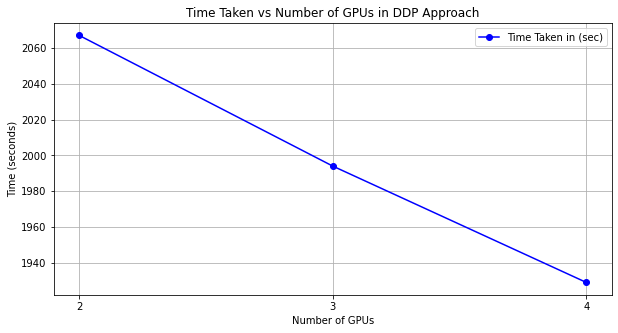

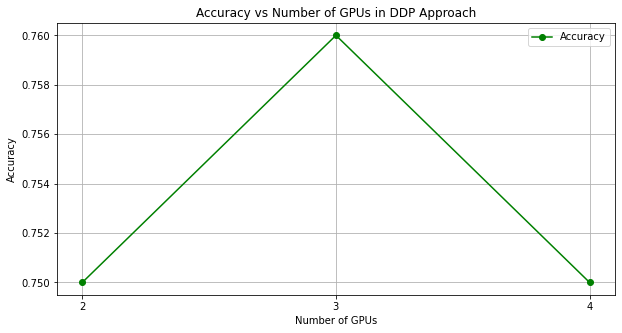

In [2]:
# Data
num_gpus = [2, 3, 4]
time_taken = [2067, 1994, 1929]
accuracy = [0.75, 0.76, 0.75]

# Plot time taken
plt.figure(figsize=(10, 5))
plt.plot(num_gpus, time_taken, marker='o', color='blue', label='Time Taken in (sec)')
plt.xlabel('Number of GPUs')
plt.ylabel('Time (seconds)')
plt.title('Time Taken vs Number of GPUs in DDP Approach')
plt.xticks(num_gpus)
plt.grid(True)
plt.legend()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(num_gpus, accuracy, marker='o', color='green', label='Accuracy')
plt.xlabel('Number of GPUs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of GPUs in DDP Approach')
plt.xticks(num_gpus)
plt.grid(True)
plt.legend()

plt.show()


## DDP with AMP

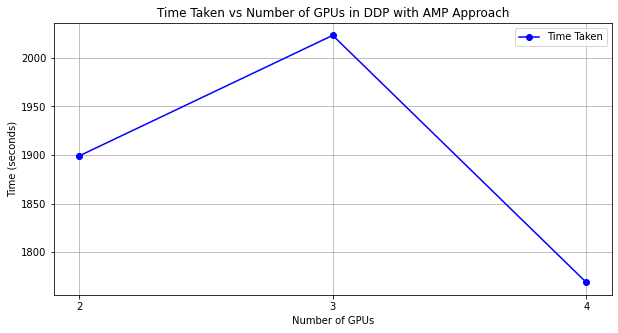

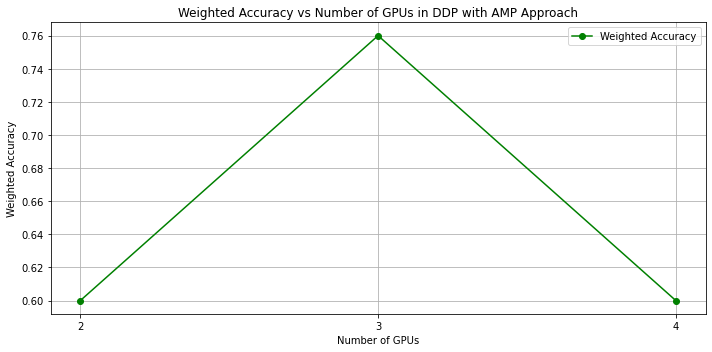

In [3]:
# Data
num_gpus = [2, 3, 4]
time_taken = [1899, 2023, 1769]
weighted_accuracy = [0.6, 0.76, 0.6]

# Plot time taken
plt.figure(figsize=(10, 5))
plt.plot(num_gpus, time_taken, marker='o', color='blue', label='Time Taken')
plt.xlabel('Number of GPUs')
plt.ylabel('Time (seconds)')
plt.title('Time Taken vs Number of GPUs in DDP with AMP Approach')
plt.xticks(num_gpus)
plt.grid(True)
plt.legend()

# Plot weighted accuracy
plt.figure(figsize=(10, 5))
plt.plot(num_gpus, weighted_accuracy, marker='o', color='green', label='Weighted Accuracy')
plt.xlabel('Number of GPUs')
plt.ylabel('Weighted Accuracy')
plt.title('Weighted Accuracy vs Number of GPUs in DDP with AMP Approach')
plt.xticks(num_gpus)
plt.grid(True)
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


## DDP vs AMP 

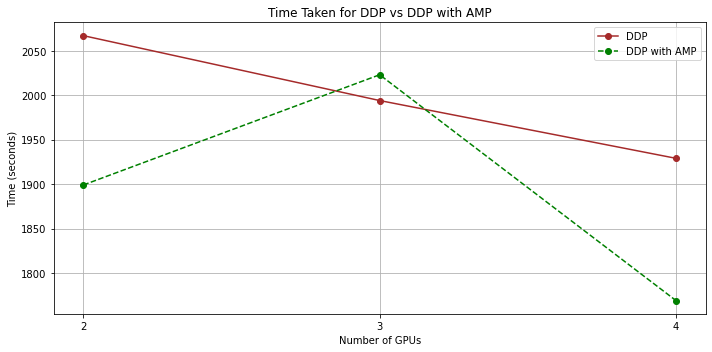

In [4]:
import matplotlib.pyplot as plt

# Data
num_gpus = [2, 3, 4]
time_ddp = [2067, 1994, 1929]
time_ddp_amp = [1899, 2023, 1769]

# Plot time taken for DDP
plt.figure(figsize=(10, 5))
plt.plot(num_gpus, time_ddp, marker='o', color='brown', linestyle='-', label='DDP')
plt.xlabel('Number of GPUs')
plt.ylabel('Time (seconds)')
plt.title('Time Taken for DDP vs DDP with AMP')
plt.xticks(num_gpus)
plt.grid(True)
plt.legend()

# Plot time taken for DDP with AMP
plt.plot(num_gpus, time_ddp_amp, marker='o', color='green', linestyle='--', label='DDP with AMP')
plt.legend()

plt.tight_layout()
plt.show()


## Time taken over different CPUs using Parallization

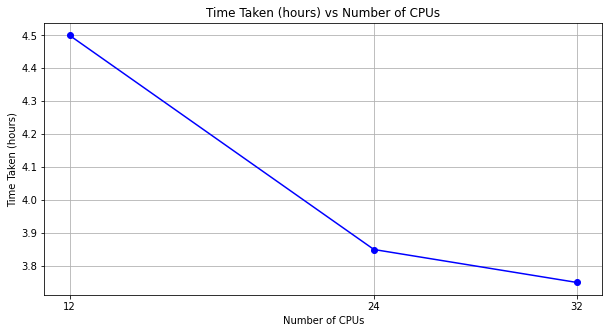

In [5]:
import matplotlib.pyplot as plt

# Data
num_cpus = [12, 24, 32]
time_taken = [4.5, 3.85, 3.75]  # Hours

# Plot
plt.figure(figsize=(10, 5))
plt.plot(num_cpus, time_taken, marker='o', color='blue', linestyle='-')
plt.xlabel('Number of CPUs')
plt.ylabel('Time Taken (hours)')
plt.title('Time Taken (hours) vs Number of CPUs')
plt.xticks(num_cpus)  #x-axis ticks to only include integer values
plt.grid(True)
plt.show()


## Single GPU vs Multiple GPU

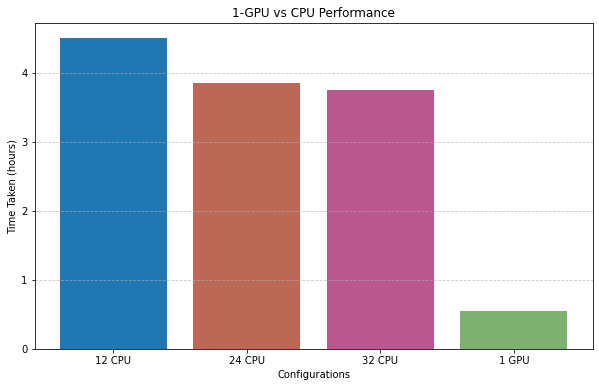

In [6]:
import matplotlib.pyplot as plt

# Data
configurations = ['12 CPU', '24 CPU', '32 CPU', '1 GPU']
time_taken = [4.5, 3.85, 3.75, 0.55]  # Hours

# Plot
plt.figure(figsize=(10, 6))
plt.bar(configurations, time_taken, color=['#1f77b4', '#BD6855', '#B9578E','#7EB170'])
# plt.bar(configurations, time_taken, color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'])

plt.xlabel('Configurations')
plt.ylabel('Time Taken (hours)')
plt.title('1-GPU vs CPU Performance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## SpeedUp

In [7]:
# Data
ddp_serial_time = 2003  # Serial time for 1 GPU in seconds

ddp_parallel_times = {
    '2 GPUs': 2067,
    '3 GPUs': 1994,
    '4 GPUs': 1929
}

ddp_amp_parallel_times = {
    '2 GPUs': 1899,
    '3 GPUs': 2023,
    '4 GPUs': 1769
}

cpu_parallel_times = {
    '32 CPUs': 3.75 * 3600,  # Convert hours to seconds
    '24 CPUs': 3.85 * 3600,
    '12 CPUs': 4.5 * 3600,
    '1 GPU': 0.55 * 3600
}

# Function to calculate speedup
def calculate_speedup(serial_time, parallel_times):
    speedup = {}
    for config, parallel_time in parallel_times.items():
        speedup[config] = serial_time / parallel_time
    return speedup

# Calculate speedup for 32 CPUs vs GPUs with DDP approach
ddp_speedup_32_cpu = calculate_speedup(cpu_parallel_times['32 CPUs'], ddp_parallel_times)
print("Speedup for 32 CPUs vs GPUs with DDP approach:")
print(ddp_speedup_32_cpu)

# Calculate speedup for 32 CPUs vs GPUs with AMP approach
amp_speedup_32_cpu = calculate_speedup(cpu_parallel_times['32 CPUs'], ddp_amp_parallel_times)
print("\nSpeedup for 32 CPUs vs GPUs with DDP-AMP approach:")
print(amp_speedup_32_cpu)

# Calculate speedup for 1 GPU vs GPUs with DDP approach
ddp_speedup_1_gpu = calculate_speedup(ddp_serial_time, ddp_parallel_times)
print("\nSpeedup for 1 GPU vs GPUs with DDP approach:")
print(ddp_speedup_1_gpu)

# Calculate speedup for 1 GPU vs GPUs with AMP approach
amp_speedup_1_gpu = calculate_speedup(ddp_serial_time, ddp_amp_parallel_times)
print("\nSpeedup for 1 GPU vs GPUs with AMP approach:")
print(amp_speedup_1_gpu)


Speedup for 32 CPUs vs GPUs with DDP approach:
{'2 GPUs': 6.531204644412192, '3 GPUs': 6.770310932798395, '4 GPUs': 6.998444790046657}

Speedup for 32 CPUs vs GPUs with DDP-AMP approach:
{'2 GPUs': 7.109004739336493, '3 GPUs': 6.673257538309441, '4 GPUs': 7.631430186546071}

Speedup for 1 GPU vs GPUs with DDP approach:
{'2 GPUs': 0.96903725205612, '3 GPUs': 1.0045135406218655, '4 GPUs': 1.0383618455158112}

Speedup for 1 GPU vs GPUs with AMP approach:
{'2 GPUs': 1.0547656661400737, '3 GPUs': 0.9901136925358379, '4 GPUs': 1.1322781232334653}


In [8]:
# Function to print speedup values neatly
def print_speedup(speedup_dict):
    print("{:<10} {:<15}".format('Configuration', 'Speedup'))
    print("-" * 25)
    for config, speedup in speedup_dict.items():
        print("{:<10} {:<15.2f}".format(config, speedup))

# Print speedup for 32 CPUs vs GPUs with DDP approach
print("Speedup for 32 CPUs vs GPUs with DDP approach:")
print_speedup(ddp_speedup_32_cpu)
print()

# Print speedup for 32 CPUs vs GPUs with AMP approach
print("Speedup for 32 CPUs vs GPUs with DDP-AMP approach:")
print_speedup(amp_speedup_32_cpu)
print()

# Print speedup for 1 GPU vs GPUs with DDP approach
print("Speedup for 1 GPU vs GPUs with DDP approach:")
print_speedup(ddp_speedup_1_gpu)
print()

# Print speedup for 1 GPU vs GPUs with AMP approach
print("Speedup for 1 GPU vs GPUs with AMP approach:")
print_speedup(amp_speedup_1_gpu)


Speedup for 32 CPUs vs GPUs with DDP approach:
Configuration Speedup        
-------------------------
2 GPUs     6.53           
3 GPUs     6.77           
4 GPUs     7.00           

Speedup for 32 CPUs vs GPUs with DDP-AMP approach:
Configuration Speedup        
-------------------------
2 GPUs     7.11           
3 GPUs     6.67           
4 GPUs     7.63           

Speedup for 1 GPU vs GPUs with DDP approach:
Configuration Speedup        
-------------------------
2 GPUs     0.97           
3 GPUs     1.00           
4 GPUs     1.04           

Speedup for 1 GPU vs GPUs with AMP approach:
Configuration Speedup        
-------------------------
2 GPUs     1.05           
3 GPUs     0.99           
4 GPUs     1.13           


## Insights

**Scaling Efficiency**: The DDP approach demonstrates good scaling efficiency, with speedup increasing as the number of GPUs increases. This indicates that distributing the workload across multiple GPUs leads to significant performance improvements.

**Impact of AMP**: The introduction of Automatic Mixed Precision (AMP) in the DDP approach further enhances performance, as seen in the higher speedup values compared to the standard DDP approach. AMP optimizes memory usage and computation, resulting in faster training times.

**Diminishing Returns**: While the speedup generally increases with the number of GPUs, there is evidence of diminishing returns, particularly in the DDP-AMP approach. Beyond a certain number of GPUs, the marginal improvement in speedup diminishes, suggesting that additional GPUs may not provide significant performance gains.

**Single GPU Performance**: Interestingly, the speedup of a single GPU compared to multiple GPUs is close to or slightly above 1. This indicates that a single GPU performs reasonably well in parallel deep learning tasks, especially when using AMP.

**Resource Utilization**: The speedup values highlight the importance of efficient resource utilization. Configurations that maximize the utilization of available GPUs or CPUs tend to exhibit higher speedup values, indicating better performance optimization.